In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pathlib import Path

from src.data.paths import project_dir

# Data structures

In [2]:
# local paths
base_path = project_dir / 'data' / 'raw'

# # onedrive paths
base_path = Path.home() / 'OneDrive - ifj.edu.pl' / 'Projects' / 'MB_foils'
base_path.exists()

True

In [3]:
#data_path = project_dir / 'data' / 'interim' / '2024-12-12' / 'protons' / 'mean_values.h5'
#data_path = Path(r"C:\Users\Legion\OneDrive - ifj.edu.pl\Projects\MB_foils\publication_Measurement_2024\analysis\interim\2024-12-12\protons\mean_values.h5")
data_path = base_path / Path("publication_Measurement_2024/analysis/interim/2024-12-12/protons/mean_values.h5")
df = pd.read_hdf(data_path, key='data')

In [4]:
df

,det_no,mean_signal,std_signal,radiation,perc_error,dose_Co60_Gy
18,16,280.959940,43.119770,Co60,15.347302,18.269084
19,17,296.808861,43.039741,Co60,14.500828,19.299641
20,18,320.609789,45.977999,Co60,14.340797,20.847268
21,19,325.591782,44.674873,Co60,13.721131,21.171216
22,20,312.354315,45.608888,Co60,14.601651,20.310465
23,21,318.818261,46.821669,Co60,14.686006,20.730776
24,22,298.089917,44.064975,Co60,14.782444,19.382940
25,23,297.058544,46.345811,Co60,15.601575,19.315876
26,24,291.979058,49.051699,Co60,16.799732,18.985589
27,25,291.174679,44.686194,Co60,15.346868,18.933285


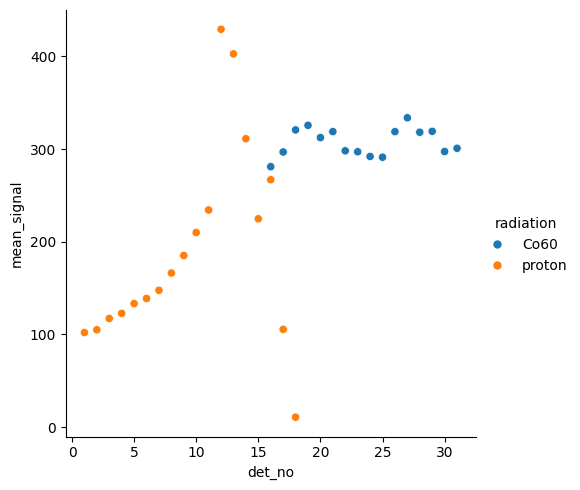

In [5]:
sns.relplot(data=df, x='det_no', y='mean_signal', hue='radiation', kind='scatter')

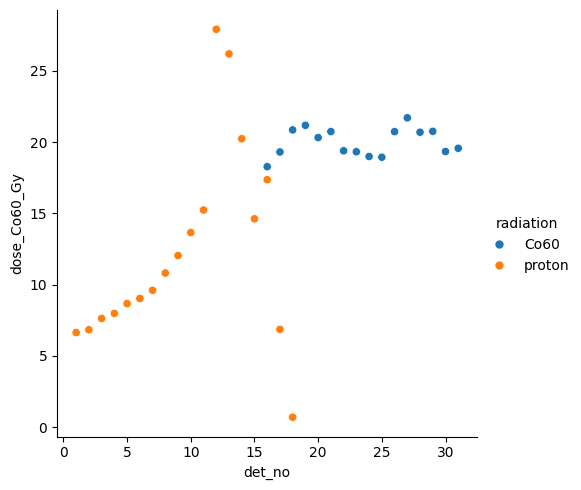

In [6]:
sns.relplot(data=df, x='det_no', y='dose_Co60_Gy', hue='radiation', kind='scatter')

In [7]:
# df.loc[df['radiation'] == 'proton', 'dose_Co60_Gy'] *= 1.1

# Bragg peak data from dosimetry and MC

In [8]:

article_plots_path = base_path / r"publication_Measurement_2024\data_for_plots\article-plots.h5"

plots_path = base_path / "publication_Measurement_2024" / "plots"
plots_path.mkdir(exist_ok=True)

#article_plots_path = base_path / "article-plots.h5"
df_bp_exp = pd.read_hdf(article_plots_path, key='bp_exp')
df_bp_mc = pd.read_hdf(article_plots_path, key='bp_mc')

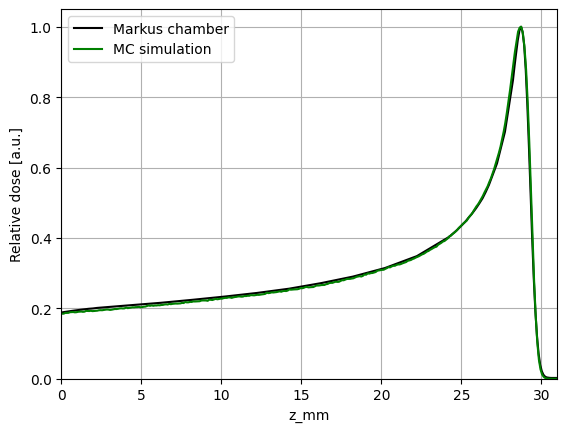

In [9]:
fig, ax = plt.subplots(nrows=1, sharex=True)
df_bp_exp.plot(ax=ax, x='Depth', y='Signal', label='Markus chamber', color='black', style='-')
df_bp_mc.plot(ax=ax, x='z_mm', y='dose', label='MC simulation', color='green', style='-')
ax.set_ylim(0,1.05)
ax.set_xlim(0, 31)
ax.grid()
ax.set_ylabel("Relative dose [a.u.]");

# Detector positions

In [10]:
#det_pos_path = Path(r"C:\Users\Legion\OneDrive - ifj.edu.pl\Projects\MB_foils\2024-11-21\fantom_MBO.xlsx")
#det_pos_path = base_path / Path("2024-12-21/fantom_MBO.xlsx")
#det_pos_path = Path(r"C:\Users\grzanka\OneDrive - ifj.edu.pl\Projects\MB_foils\2024-12-12\fantom_MBOvsEBT3.xlsx")
det_pos_path = base_path / Path("2024-12-12/fantom_MBOvsEBT3.xlsx")
det_pos = pd.read_excel(
    det_pos_path,
    sheet_name='exp_11.12.2024',
    skiprows=5, 
    nrows=50, 
    usecols="A,D,F,H",
    names=["det_no", "det_type", "thickness_mm", "pos_center_mm"]
    )
det_pos = det_pos.query("det_type == 'folia MBO'").copy()
det_pos.reset_index(drop=True, inplace=True)
det_pos['det_no'] = det_pos['det_no'].astype(int)
#det_pos['pos_center_mm'] += 0.08
det_pos

,det_no,det_type,thickness_mm,pos_center_mm
0,1,folia MBO,0.48825,0.635050
1,2,folia MBO,0.47250,3.268700
2,3,folia MBO,0.46725,6.282775
3,4,folia MBO,0.47145,9.296325
4,5,folia MBO,0.47880,12.315650
5,6,folia MBO,0.49035,15.321625
6,7,folia MBO,0.48300,18.306900
7,8,folia MBO,0.47040,21.316400
8,9,folia MBO,0.47880,24.312400
9,10,folia MBO,0.48510,25.161150


In [11]:
df_with_pos = det_pos.join(df.set_index('det_no'), on='det_no').copy()
df_with_pos = df_with_pos.query("radiation == 'proton'").copy()
df_with_pos

,det_no,det_type,thickness_mm,pos_center_mm,mean_signal,std_signal,radiation,perc_error,dose_Co60_Gy
0,1,folia MBO,0.48825,0.635050,102.022087,28.158341,proton,27.600240,6.633864
1,2,folia MBO,0.47250,3.268700,104.983583,27.386678,proton,26.086629,6.826432
2,3,folia MBO,0.46725,6.282775,117.211326,29.037474,proton,24.773607,7.621526
3,4,folia MBO,0.47145,9.296325,122.670697,29.722597,proton,24.229582,7.976515
4,5,folia MBO,0.47880,12.315650,133.239343,30.886061,proton,23.180886,8.663729
5,6,folia MBO,0.49035,15.321625,138.772086,32.051308,proton,23.096366,9.023489
6,7,folia MBO,0.48300,18.306900,147.602721,32.741967,proton,22.182495,9.597690
7,8,folia MBO,0.47040,21.316400,166.252409,33.997225,proton,20.449162,10.810364
8,9,folia MBO,0.47880,24.312400,185.127414,35.276201,proton,19.055093,12.037689
9,10,folia MBO,0.48510,25.161150,209.919079,37.452993,proton,17.841634,13.649737


Text(0, 0.5, 'Dose [Gy]')

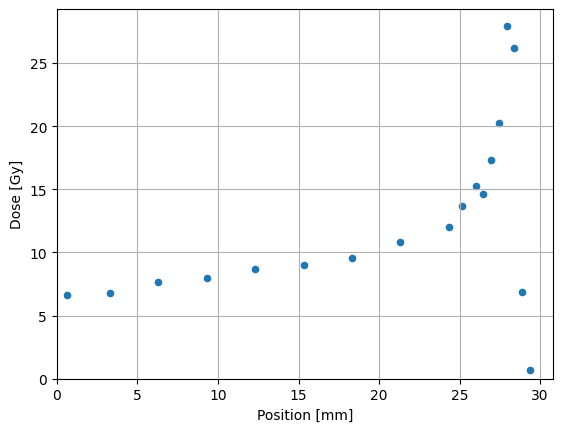

In [12]:
fig, ax = plt.subplots(nrows=1, sharex=True)
df_with_pos.plot(x='pos_center_mm', y='dose_Co60_Gy', kind='scatter', ax = ax)
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.grid()
ax.set_xlabel("Position [mm]")
ax.set_ylabel("Dose [Gy]")

# Combining with MC

In [13]:
# create spline interpolator object from scipy for x = df_bp_mc.z_mm and y = df_bp_mc.dose
from scipy.interpolate import interp1d
f = interp1d(df_bp_mc.z_mm, df_bp_mc.dose, kind='cubic')

In [14]:
df_with_pos['dose_interp'] = f(df_with_pos['pos_center_mm'])
df_with_pos['dose_interp'] /= df_with_pos['dose_interp'].iloc[0]
df_with_pos['dose_interp'] *= 7
df_with_pos['dose_Co60_Gy_err'] = df_with_pos['dose_Co60_Gy'] * df_with_pos['std_signal'] / df_with_pos['mean_signal']
df_with_pos

,det_no,det_type,thickness_mm,pos_center_mm,mean_signal,std_signal,radiation,perc_error,dose_Co60_Gy,dose_interp,dose_Co60_Gy_err
0,1,folia MBO,0.48825,0.635050,102.022087,28.158341,proton,27.600240,6.633864,7.000000,1.830962
1,2,folia MBO,0.47250,3.268700,104.983583,27.386678,proton,26.086629,6.826432,7.306731,1.780786
2,3,folia MBO,0.46725,6.282775,117.211326,29.037474,proton,24.773607,7.621526,7.759322,1.888127
3,4,folia MBO,0.47145,9.296325,122.670697,29.722597,proton,24.229582,7.976515,8.321633,1.932676
4,5,folia MBO,0.47880,12.315650,133.239343,30.886061,proton,23.180886,8.663729,8.818405,2.008329
5,6,folia MBO,0.49035,15.321625,138.772086,32.051308,proton,23.096366,9.023489,9.659324,2.084098
6,7,folia MBO,0.48300,18.306900,147.602721,32.741967,proton,22.182495,9.597690,10.603142,2.129007
7,8,folia MBO,0.47040,21.316400,166.252409,33.997225,proton,20.449162,10.810364,12.130737,2.210629
8,9,folia MBO,0.47880,24.312400,185.127414,35.276201,proton,19.055093,12.037689,15.019651,2.293793
9,10,folia MBO,0.48510,25.161150,209.919079,37.452993,proton,17.841634,13.649737,16.380714,2.435336


Text(0, 0.5, 'Dose [Gy]')

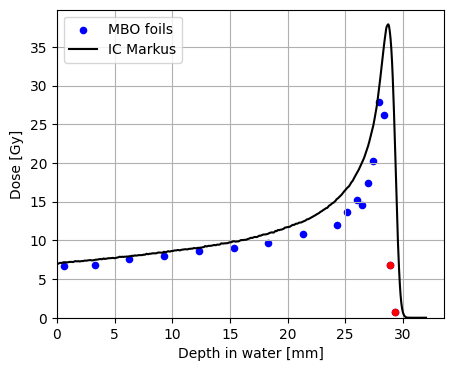

In [15]:
fig, ax = plt.subplots(figsize=(5, 4))  
x_mm = np.linspace(0.05, 32, 1000)
dose_IC_Gy = f(x_mm) * 7 / f(df_bp_mc.z_mm.iloc[0])
df_with_pos.plot(x='pos_center_mm', y='dose_Co60_Gy', kind='scatter', ax = ax, color='blue', label='MBO foils', marker='o')
# plot errorbars from df_with_pos['dose_Co60_Gy_err']
xerror = 0.23
#ax.errorbar(df_with_pos['pos_center_mm'], df_with_pos['dose_Co60_Gy'], xerr=xerror, yerr=df_with_pos['dose_Co60_Gy_err'], fmt='o', color='blue')

# plot red circles around last two points
#ax.errorbar(df_with_pos['pos_center_mm'].iloc[-2:], df_with_pos['dose_Co60_Gy'].iloc[-2:], xerr=xerror, yerr=df_with_pos['dose_Co60_Gy_err'].iloc[-2:], fmt='o', color='red')
ax.scatter(df_with_pos['pos_center_mm'].iloc[-2:], df_with_pos['dose_Co60_Gy'].iloc[-2:], marker='o', color='red', s=20)

ax.plot(x_mm, dose_IC_Gy, color='black', label='IC Markus')
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.grid()
ax.legend()

ax.set_xlabel("Depth in water [mm]")
ax.set_ylabel("Dose [Gy]")

#fig.savefig(plots_path / "bp.svg")

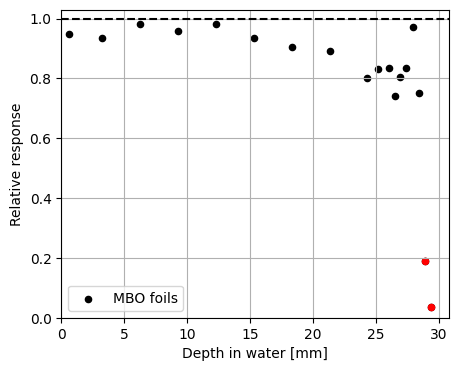

In [16]:
df_with_pos['efficiency'] = df_with_pos['dose_Co60_Gy'] / df_with_pos['dose_interp']
df_with_pos['efficiency_eff'] = df_with_pos['dose_Co60_Gy'] / df_with_pos['dose_interp'] * df_with_pos['std_signal'] / df_with_pos['mean_signal']
fig, ax = plt.subplots(figsize=(5, 4))
df_with_pos.plot(x='pos_center_mm', y='efficiency', kind='scatter', color='black', grid=True, ax=ax, marker='o', label='MBO foils')
#ax.errorbar(df_with_pos['pos_center_mm'], df_with_pos['efficiency'], xerr=xerror, yerr=df_with_pos['efficiency_eff'], fmt='.', color='black')

# plot red circles around last two points
#ax.errorbar(df_with_pos['pos_center_mm'].iloc[-2:], df_with_pos['efficiency'].iloc[-2:], xerr=xerror, yerr=df_with_pos['efficiency_eff'].iloc[-2:], fmt='o', color='red')

# plot last two points as large red circles without error bars
ax.scatter(df_with_pos['pos_center_mm'].iloc[-2:], df_with_pos['efficiency'].iloc[-2:], color='red', s=20, label='_nolabel')

ax.axhline(1, color='black', linestyle='--')
ax.set_xlim(0, None)
ax.set_ylim(0, None)
#ax.set_xlim(28, None)

ax.set_xlabel("Depth in water [mm]")
ax.set_ylabel("Relative response")
ax.legend()

#fig.savefig(plots_path / "efficiency.svg")

In [17]:
df_with_pos.query('det_no < 18')

,det_no,det_type,thickness_mm,pos_center_mm,mean_signal,std_signal,radiation,perc_error,dose_Co60_Gy,dose_interp,dose_Co60_Gy_err,efficiency,efficiency_eff
0,1,folia MBO,0.48825,0.635050,102.022087,28.158341,proton,27.600240,6.633864,7.000000,1.830962,0.947695,0.261566
1,2,folia MBO,0.47250,3.268700,104.983583,27.386678,proton,26.086629,6.826432,7.306731,1.780786,0.934266,0.243719
2,3,folia MBO,0.46725,6.282775,117.211326,29.037474,proton,24.773607,7.621526,7.759322,1.888127,0.982241,0.243337
3,4,folia MBO,0.47145,9.296325,122.670697,29.722597,proton,24.229582,7.976515,8.321633,1.932676,0.958528,0.232247
4,5,folia MBO,0.47880,12.315650,133.239343,30.886061,proton,23.180886,8.663729,8.818405,2.008329,0.982460,0.227743
5,6,folia MBO,0.49035,15.321625,138.772086,32.051308,proton,23.096366,9.023489,9.659324,2.084098,0.934174,0.215760
6,7,folia MBO,0.48300,18.306900,147.602721,32.741967,proton,22.182495,9.597690,10.603142,2.129007,0.905174,0.200790
7,8,folia MBO,0.47040,21.316400,166.252409,33.997225,proton,20.449162,10.810364,12.130737,2.210629,0.891155,0.182234
8,9,folia MBO,0.47880,24.312400,185.127414,35.276201,proton,19.055093,12.037689,15.019651,2.293793,0.801463,0.152719
9,10,folia MBO,0.48510,25.161150,209.919079,37.452993,proton,17.841634,13.649737,16.380714,2.435336,0.833281,0.148671


(0.0, 2.0)

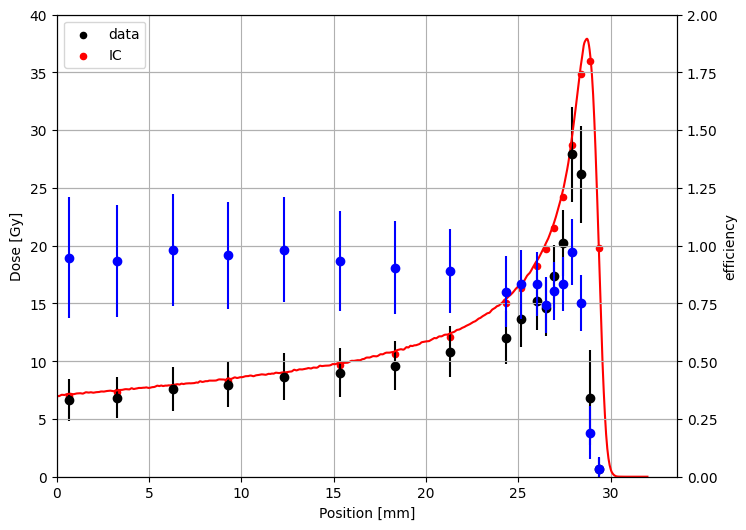

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

df_with_pos.query('radiation=="proton"').plot(x='pos_center_mm', y='dose_Co60_Gy', kind='scatter', ax = ax, color='black', label='data')
ax.errorbar(df_with_pos['pos_center_mm'], df_with_pos['dose_Co60_Gy'], yerr=df_with_pos['dose_Co60_Gy_err'], fmt='o', color='black')
df_with_pos.query('radiation=="proton"').plot(x='pos_center_mm', y='dose_interp', kind='scatter', ax = ax, color='red', label='IC')
ax.plot(x_mm, dose_IC_Gy, color='red')
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.grid()
ax.set_xlabel("Position [mm]")
ax.set_ylabel("Dose [Gy]")

ax_eff = ax.twinx()
df_with_pos.query('radiation=="proton"').plot(x='pos_center_mm', y='efficiency', kind='scatter', color='blue', grid=True, ax=ax_eff)
ax_eff.errorbar(df_with_pos['pos_center_mm'], df_with_pos['efficiency'], yerr=df_with_pos['efficiency_eff'], fmt='o', color='blue')

ax.set_ylim(0,40)
ax_eff.set_ylim(0,2)

In [20]:
lmp_path = base_path.parent / 'LMP_foils' / 'efficiency.h5'
lmp_path.exists()

True

In [21]:
df = pd.read_hdf(lmp_path)
df

,pos_mm,eff,eff_std,dose_Gy_mean,dose_Gy_std
det_id,,,,,
2,29.56,0.014005,0.081346,0.227975,1.324152
3,29.00,0.005808,0.014070,0.334010,0.809152
4,28.46,0.010462,0.013282,0.625318,0.793901
5,27.92,0.031486,0.033122,1.501177,1.579186
6,27.38,0.094083,0.067425,3.810023,2.730489
7,26.84,0.265814,0.289784,9.539484,10.399720
8,26.28,0.533005,0.095467,17.303617,3.099268
9,25.72,0.678903,0.066059,20.442693,1.989139
11,24.59,0.624848,0.065625,16.602333,1.743656


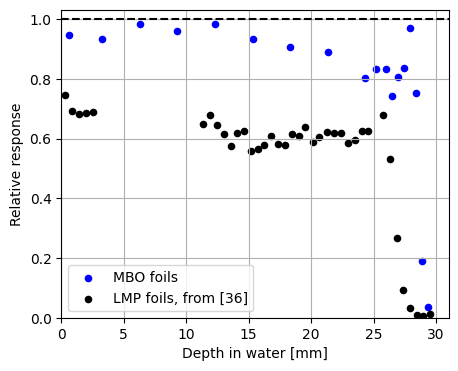

In [28]:
df_with_pos['efficiency'] = df_with_pos['dose_Co60_Gy'] / df_with_pos['dose_interp']
df_with_pos['efficiency_eff'] = df_with_pos['dose_Co60_Gy'] / df_with_pos['dose_interp'] * df_with_pos['std_signal'] / df_with_pos['mean_signal']
fig, ax = plt.subplots(figsize=(5, 4))
df_with_pos.plot(x='pos_center_mm', y='efficiency', kind='scatter', color='blue', grid=True, ax=ax, marker='o', label='MBO foils')

df.plot(x='pos_mm', y='eff', kind='scatter', color='black', grid=True, ax=ax, marker='o', label='LMP foils, from [36]')

ax.axhline(1, color='black', linestyle='--')
ax.set_xlim(0, None)
ax.set_ylim(0, None)
#ax.set_xlim(28, None)

ax.set_xlabel("Depth in water [mm]")
ax.set_ylabel("Relative response")
ax.legend()

fig.savefig(plots_path / "efficiency_vs_lmp.svg")